In [1]:
import os
import h5py
import time
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import gridspec

DIR_DATASET = "./data_set/"

In [2]:
filename = "N-CMAPSS_DS01-005.h5"

h5 = h5py.File(DIR_DATASET + filename,'r')

features = h5.keys() # VSTOXX futures data
print(features)

h5.close()


<KeysViewHDF5 ['A_dev', 'A_test', 'A_var', 'T_dev', 'T_test', 'T_var', 'W_dev', 'W_test', 'W_var', 'X_s_dev', 'X_s_test', 'X_s_var', 'X_v_dev', 'X_v_test', 'X_v_var', 'Y_dev', 'Y_test']>


In [3]:

# Load data
with h5py.File(DIR_DATASET + filename, 'r') as hdf:
        # Development set
        W_dev = np.array(hdf.get('W_dev'))             # W
        X_s_dev = np.array(hdf.get('X_s_dev'))         # X_s
        X_v_dev = np.array(hdf.get('X_v_dev'))         # X_v
        T_dev = np.array(hdf.get('T_dev'))             # T
        Y_dev = np.array(hdf.get('Y_dev'))             # RUL  
        A_dev = np.array(hdf.get('A_dev'))             # Auxiliary

        # Test set
        W_test = np.array(hdf.get('W_test'))           # W
        X_s_test = np.array(hdf.get('X_s_test'))       # X_s
        X_v_test = np.array(hdf.get('X_v_test'))       # X_v
        T_test = np.array(hdf.get('T_test'))           # T
        Y_test = np.array(hdf.get('Y_test'))           # RUL  
        A_test = np.array(hdf.get('A_test'))           # Auxiliary
        
        # Varnams
        W_var = np.array(hdf.get('W_var'))
        X_s_var = np.array(hdf.get('X_s_var'))  
        X_v_var = np.array(hdf.get('X_v_var')) 
        T_var = np.array(hdf.get('T_var'))
        A_var = np.array(hdf.get('A_var'))
        
        # from np.array to list dtype U4/U5
        W_var = list(np.array(W_var, dtype='U20'))
        X_s_var = list(np.array(X_s_var, dtype='U20'))  
        X_v_var = list(np.array(X_v_var, dtype='U20')) 
        T_var = list(np.array(T_var, dtype='U20'))
        A_var = list(np.array(A_var, dtype='U20'))
                          
W = np.concatenate((W_dev, W_test), axis=0)  
X_s = np.concatenate((X_s_dev, X_s_test), axis=0)
X_v = np.concatenate((X_v_dev, X_v_test), axis=0)
T = np.concatenate((T_dev, T_test), axis=0)
Y = np.concatenate((Y_dev, Y_test), axis=0) 
A = np.concatenate((A_dev, A_test), axis=0) 
    
print ("W shape: " + str(W.shape))
print ("X_s shape: " + str(X_s.shape))
print ("X_v shape: " + str(X_v.shape))
print ("T shape: " + str(T.shape))
print ("A shape: " + str(A.shape))

W shape: (7641868, 4)
X_s shape: (7641868, 14)
X_v shape: (7641868, 14)
T shape: (7641868, 10)
A shape: (7641868, 4)


In [4]:
df_A = DataFrame(data=A, columns=A_var)
df_A.describe()

,unit,cycle,Fc,hs
count,7.641868e+06,7.641868e+06,7.641868e+06,7.641868e+06
mean,5.562970e+00,4.452661e+01,2.252313e+00,2.688846e-01
std,2.869946e+00,2.593783e+01,7.779728e-01,4.433799e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.000000e+00,2.200000e+01,2.000000e+00,0.000000e+00
50%,5.000000e+00,4.400000e+01,2.000000e+00,0.000000e+00
75%,8.000000e+00,6.600000e+01,3.000000e+00,1.000000e+00
max,1.000000e+01,1.000000e+02,3.000000e+00,1.000000e+00


In [5]:
print('Engine units in df: ', np.unique(df_A['unit']))

Engine units in df:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Text(0, 0.5, 'Flight Class # [-]')

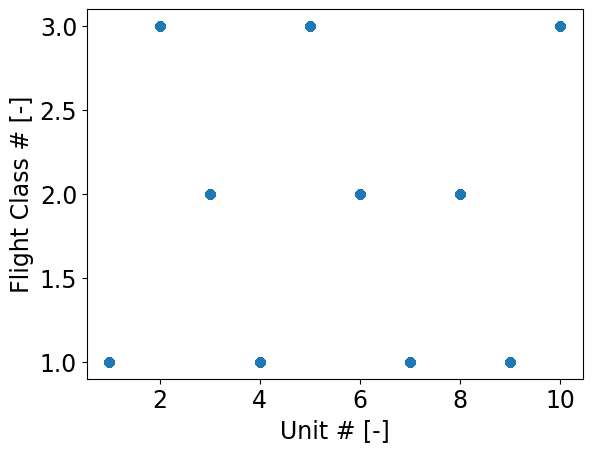

In [6]:
# qui viene mostrato la classe di volo per ogni aereo:
#
# classe 1: lenght 1 to 3 ore
# classe 2: lenght 3 to 5 ore
# classe 3: lenght 5 to 7 ore
labelsize = 17
plt.plot(df_A.unit, df_A.Fc, 'o')
plt.tick_params(axis='x', labelsize=labelsize )
plt.tick_params(axis='y', labelsize=labelsize )
plt.xlabel('Unit # [-]', fontsize=labelsize)
plt.ylabel('Flight Class # [-]', fontsize=labelsize )

In [7]:
# qui stampiamo per ogni aereo il numero di cicli compiuti
for i in np.unique(df_A['unit']):
    print('Unit: ' + str(i) + ' - Number of flight cycles (t_{EOF}): ', len(np.unique(df_A.loc[df_A['unit'] == i, 'cycle'])))

Unit: 1.0 - Number of flight cycles (t_{EOF}):  100
Unit: 2.0 - Number of flight cycles (t_{EOF}):  75
Unit: 3.0 - Number of flight cycles (t_{EOF}):  100
Unit: 4.0 - Number of flight cycles (t_{EOF}):  95
Unit: 5.0 - Number of flight cycles (t_{EOF}):  89
Unit: 6.0 - Number of flight cycles (t_{EOF}):  94
Unit: 7.0 - Number of flight cycles (t_{EOF}):  90
Unit: 8.0 - Number of flight cycles (t_{EOF}):  89
Unit: 9.0 - Number of flight cycles (t_{EOF}):  80
Unit: 10.0 - Number of flight cycles (t_{EOF}):  82


In [8]:
#DATI DATASET W
# ovvero per ogni aereo vengono mostrati i seguenti dati ogni 10 secondi
# Mach: velocità di un aereo in relazione alla velocità del suono nell'aria.
# alt: Altitudine a cui si trova
# TRA (throttle-resolver angle): indica la quantità di potenza erogata dal motore dell'aeromobile in relazione alla posizione della manetta del pilota.
# T2: temperatura totale all'ingresso del ventilatore

df_W = DataFrame(data=W, columns=W_var)
df_W['unit'] = df_A['unit'].values
df_W

,alt,Mach,TRA,T2,unit
0,3013.0,0.376362,70.311996,522.314770,1.0
1,3020.0,0.376866,70.311996,522.327145,1.0
2,3025.0,0.377685,70.311996,522.371840,1.0
3,3035.0,0.376992,70.399887,522.282418,1.0
4,3043.0,0.377622,70.399887,522.300605,1.0
...,...,...,...,...,...
7641863,3018.0,0.310653,26.367001,517.710478,10.0
7641864,3014.0,0.309960,26.367001,517.681857,10.0
7641865,3010.0,0.310149,26.367001,517.707243,10.0
7641866,3005.0,0.309834,26.367001,517.706106,10.0


In [9]:
def plot_df_single_color(data, variables, labels, size=12, labelsize=17, name=None):
    """
    """
    plt.clf()        
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs   = gridspec.GridSpec(rows, cols)    
    fig  = plt.figure(figsize=(size,max(size,rows*2))) 
    
    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        ax.plot(data[variables[n]], marker='.', markerfacecolor='none', alpha = 0.7)
        ax.tick_params(axis='x', labelsize=labelsize)
        ax.tick_params(axis='y', labelsize=labelsize)
        plt.ylabel(labels[n], fontsize=labelsize)
        plt.xlabel('Time [s]', fontsize=labelsize)
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)   
    plt.show()
    plt.close()

In [10]:
def plot_df_color_per_unit(data, variables, labels, size=7, labelsize=17, option='Time', name=None):
    """
    """
    plt.clf()        
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs   = gridspec.GridSpec(rows, cols)
    leg  = []
    fig  = plt.figure(figsize=(size,max(size,rows*2)))
    color_dic_unit = {'Unit 1': 'C0', 'Unit 2': 'C1', 'Unit 3': 'C2', 'Unit 4': 'C3', 'Unit 5': 'C4', 'Unit 6': 'C5',
                      'Unit 7': 'C6', 'Unit 8': 'C7', 'Unit 9': 'C8', 'Unit 10': 'C9', 'Unit 11': 'C10',
                      'Unit 12': 'C11', 'Unit 13': 'C12', 'Unit 14': 'C13', 'Unit 15': 'C14', 'Unit 16': 'C15',
                      'Unit 17': 'C16', 'Unit 18': 'C17', 'Unit 19': 'C18', 'Unit 20': 'C19'} 
    
    unit_sel  = np.unique(data['unit'])
    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        for j in unit_sel:
            data_unit = data.loc[data['unit'] == j]
            if option=='cycle':
                time_s = data.loc[data['unit'] == j, 'cycle']
                label_x = 'Time [cycle]'
            else:
                time_s = np.arange(len(data_unit))
                label_x = 'Time [s]'
            ax.plot(time_s, data_unit[variables[n]], '-o', color=color_dic_unit['Unit ' + str(int(j))],
                    alpha=0.7, markersize=5)
            ax.tick_params(axis='x', labelsize=labelsize)
            ax.tick_params(axis='y', labelsize=labelsize)
            leg.append('Unit '+str(int(j)))
        plt.ylabel(labels[n], fontsize=labelsize)    
        plt.xlabel(label_x, fontsize=labelsize)
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        if n==0:
            ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.legend(leg, loc='best', fontsize=labelsize-2) #lower left
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)   
    plt.show()
    plt.close()

<Figure size 640x480 with 0 Axes>

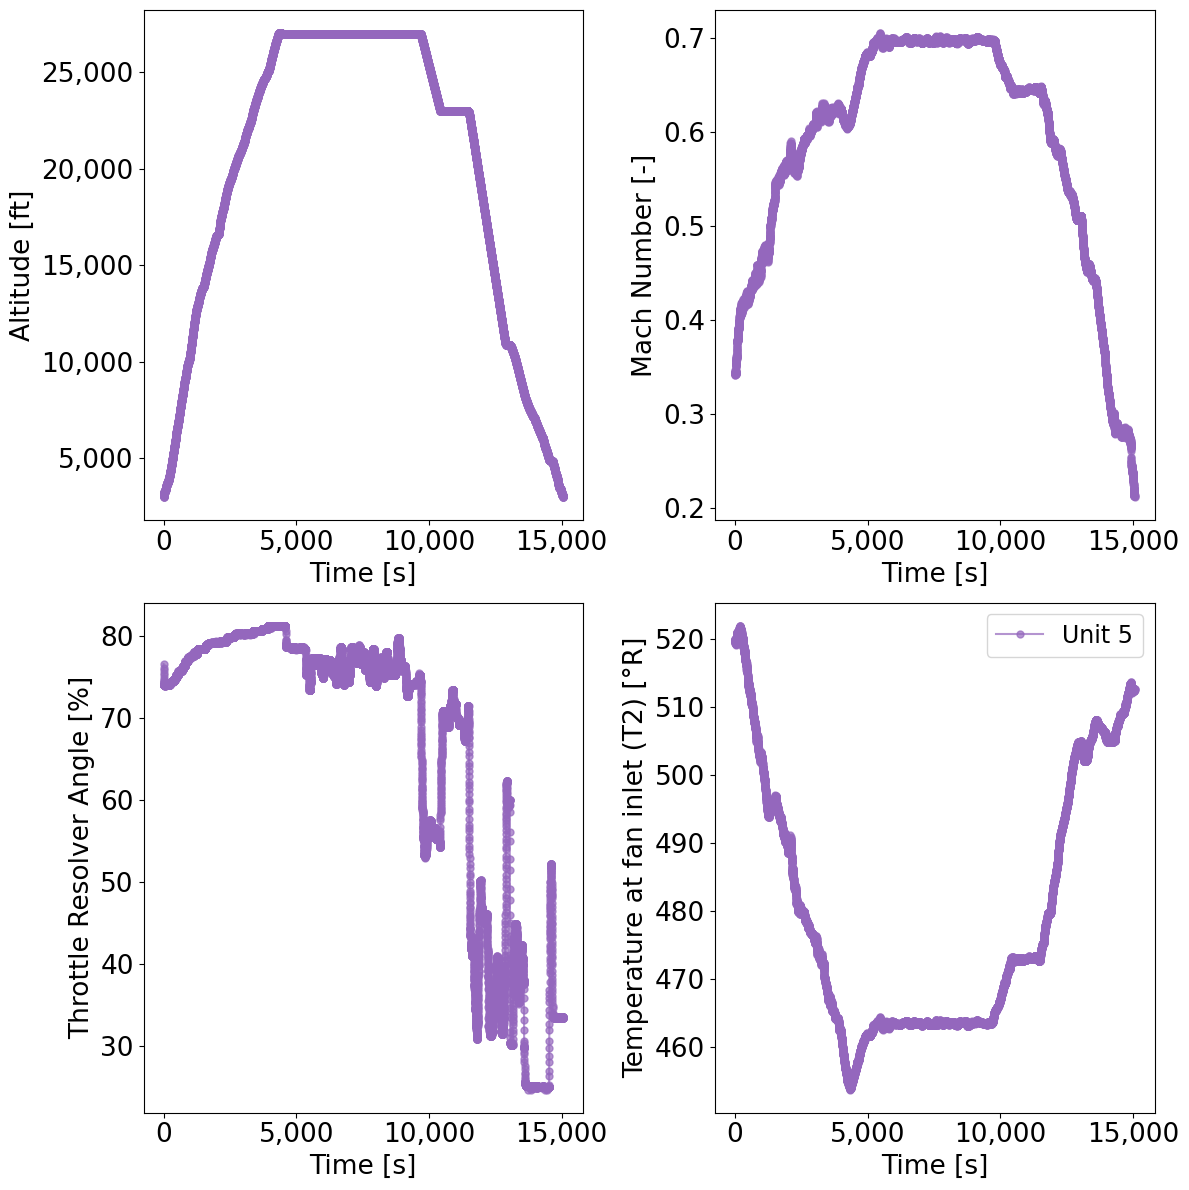

In [11]:
df_W_u = df_W.loc[(df_A.unit == 5) & (df_A.cycle == 1)]
df_W_u.reset_index(inplace=True, drop=True) 
labels = ['Altitude [ft]', 'Mach Number [-]', 'Throttle Resolver Angle [%]', 'Temperature at fan inlet (T2) [°R]']
plot_df_color_per_unit(df_W_u, W_var , labels, size=12, labelsize=19, name='flight_profile_DS02.png')
# Grafici che mostrano l'andamento nel tempo per l'unità 5 al ciclo 1 dei parametri altezza, Mach, TRA, Temperatura



Text(0, 0.5, 'Flight Altitude - [ft]')

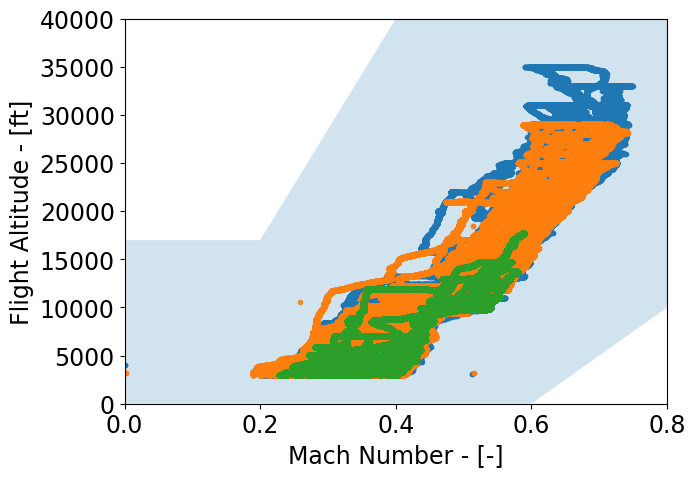

In [12]:
labelsize = 17
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8])
u = np.array([1.7, 1.7, 4.0, 4.0, 4.0])*10000
l = np.array([0.0, 0.0, 0.0, 0.0, 1.0])*10000
plt.figure(figsize=(7,5)) 
plt.fill_between(x, l, u, alpha=0.2)
plt.plot(df_W.loc[df_A['Fc'] == 3, 'Mach'], df_W.loc[df_A['Fc'] == 3, 'alt'], '.', alpha=0.9)
plt.plot(df_W.loc[df_A['Fc'] == 2, 'Mach'], df_W.loc[df_A['Fc'] == 2, 'alt'], '.', alpha=0.9)
plt.plot(df_W.loc[df_A['Fc'] == 1, 'Mach'], df_W.loc[df_A['Fc'] == 1, 'alt'], '.', alpha=0.9)
plt.tick_params(axis='x', labelsize=labelsize )
plt.tick_params(axis='y', labelsize=labelsize )
plt.xlim((0.0, 0.8))
plt.ylim((0, 40000)) 
plt.xlabel('Mach Number - [-]', fontsize=labelsize)
plt.ylabel('Flight Altitude - [ft]', fontsize=labelsize)
# qui mettiamo in relazione con 3 colori diversi le 3 classi di volo (corte - C1, medie - C2, lunghe -C3) 
# Per ogni classe si mostra che rapporto c'è tra la velocità (Mach number) e l'altezza in volo (Flight altitude)
# la blu rappresenta i voli di classe 3 (Lunghe distanze)
# l'arancione quelli di classe 2 (Medie distanze)
# il verde quelli di classe 1 (Corte distanze)

In [13]:
def plot_kde(leg, variables, labels, size, units, df_W, df_A, labelsize=17, name=None):
    """
    """
    plt.clf()
       
    input_dim = len(variables)
    cols = min(np.floor(input_dim**0.5).astype(int),4)
    rows = (np.ceil(input_dim / cols)).astype(int)
    gs = gridspec.GridSpec(rows, cols)
    
    color_dic_unit = {'Unit 1': 'C0', 'Unit 2': 'C1', 'Unit 3': 'C2', 'Unit 4': 'C3', 'Unit 5': 'C4', 'Unit 6': 'C5',
                      'Unit 7': 'C6', 'Unit 8': 'C7', 'Unit 9': 'C8', 'Unit 10': 'C9', 'Unit 11': 'C10',
                      'Unit 12': 'C11', 'Unit 13': 'C12', 'Unit 14': 'C13', 'Unit 15': 'C14', 'Unit 16': 'C15',
                      'Unit 17': 'C16', 'Unit 18': 'C17', 'Unit 19': 'C18', 'Unit 20': 'C19'} 
    
    fig = plt.figure(figsize=(size,max(size,rows*2)))       

    for n in range(input_dim):
        ax = fig.add_subplot(gs[n])
        for k, elem in enumerate(units):
            sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
                        color=color_dic_unit[leg[k]], shade=True, gridsize=100)  
            ax.tick_params(axis='x', labelsize=labelsize)
            ax.tick_params(axis='y', labelsize=labelsize)
        
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))        
        plt.xlabel(labels[n], fontsize=labelsize)
        plt.ylabel('Density [-]', fontsize=labelsize)
        if n==0:
            plt.legend(leg, fontsize=labelsize-4, loc=0)
        else:
            plt.legend(leg, fontsize=labelsize-4, loc=2)
    plt.tight_layout()
    if name is not None:
        plt.savefig(name, format='png', dpi=300)    
    plt.show()
    plt.close()

C:\Users\sam\AppData\Local\Temp\ipykernel_3664\4172860585.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
C:\Users\sam\AppData\Local\Temp\ipykernel_3664\4172860585.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
C:\Users\sam\AppData\Local\Temp\ipykernel_3664\4172860585.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_W.loc[df_A['unit'] == elem, variables[n]],
C:\Users\sam\AppData\Local\Temp\ipykernel_3664\4172860585.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This wil

<Figure size 640x480 with 0 Axes>

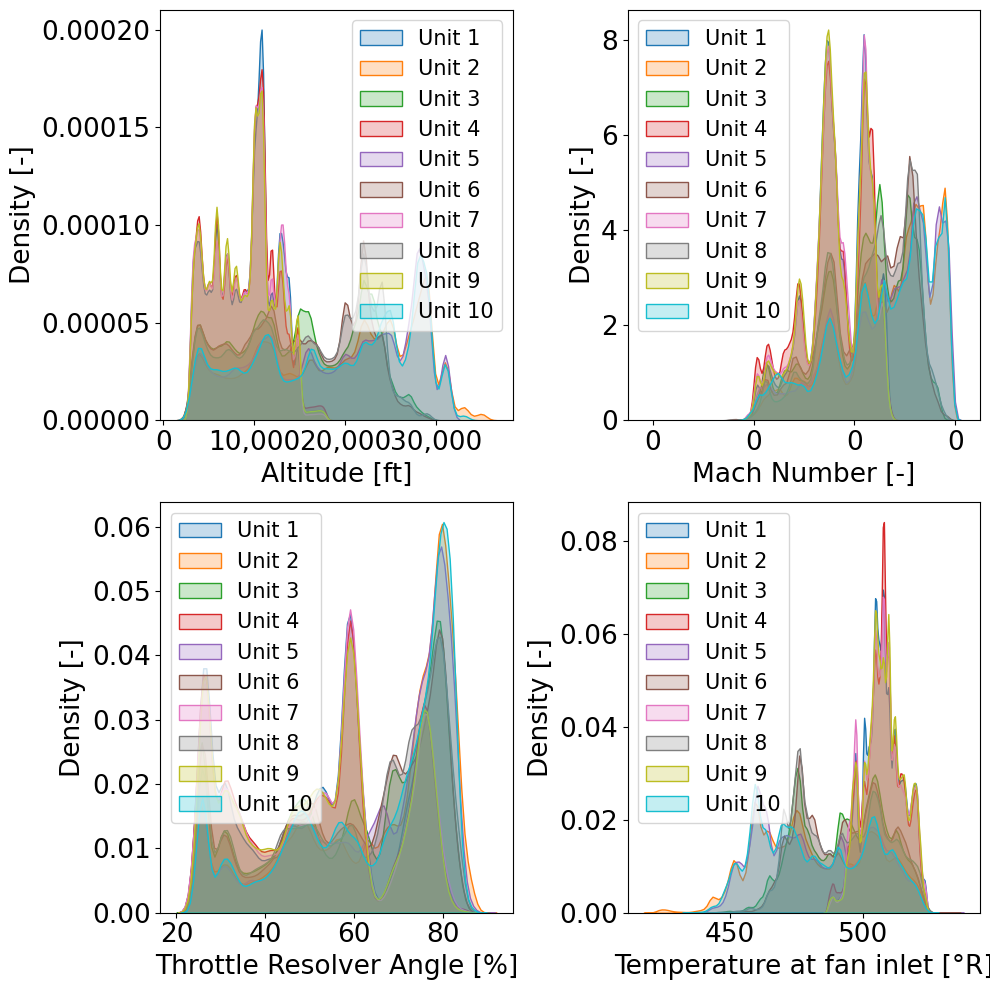

In [14]:
variables = ['alt', 'Mach', 'TRA', 'T2']
labels = ['Altitude [ft]', 'Mach Number [-]', 'Throttle Resolver Angle [%]', 'Temperature at fan inlet [°R]']
size = 10

units = list(np.unique(df_A['unit']))
leg = ['Unit ' + str(int(u)) for u in units]

plot_kde(leg, variables, labels, size, units, df_W, df_A, labelsize=19, name='kde_DS02.png')

In [15]:
df_T = DataFrame(data=T, columns=T_var) 
df_T['unit'] = df_A['unit'].values
df_T['cycle'] = df_A['cycle'].values
df_Ts = df_T.drop_duplicates()
df_Ts.describe()

,fan_eff_mod,fan_flow_mod,LPC_eff_mod,LPC_flow_mod,HPC_eff_mod,HPC_flow_mod,HPT_eff_mod,HPT_flow_mod,LPT_eff_mod,LPT_flow_mod,unit,cycle
count,894.0,894.0,894.0,894.0,894.0,894.0,894.000000,894.0,894.0,894.0,894.000000,894.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,-0.003893,0.0,0.0,0.0,5.392617,45.551454
std,0.0,0.0,0.0,0.0,0.0,0.0,0.004207,0.0,0.0,0.0,2.842879,26.409073
min,0.0,0.0,0.0,0.0,0.0,0.0,-0.018806,0.0,0.0,0.0,1.000000,1.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,-0.005124,0.0,0.0,0.0,3.000000,23.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,-0.001917,0.0,0.0,0.0,5.000000,45.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,-0.001091,0.0,0.0,0.0,8.000000,67.750000
max,0.0,0.0,0.0,0.0,0.0,0.0,-0.000117,0.0,0.0,0.0,10.000000,100.000000


In [16]:
import plotly.express as px
varsel = ['unit', 'HPT_eff_mod', 'LPT_eff_mod', 'LPT_flow_mod']
df_Tss = df_Ts.loc[:,varsel]
fig = px.parallel_coordinates(df_Tss, color="unit", labels={"unit": "Units",
                              "HPT_eff_mod": "HPT_eff_mod", "LPT_eff_mod": "LPT_eff_mod",
                              "LPT_flow_mod": "LPT_flow_mod", },
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)

c:\Users\sam\AppData\Local\Programs\Python\Python39\lib\site-packages\plotly\express\_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


<Figure size 640x480 with 0 Axes>

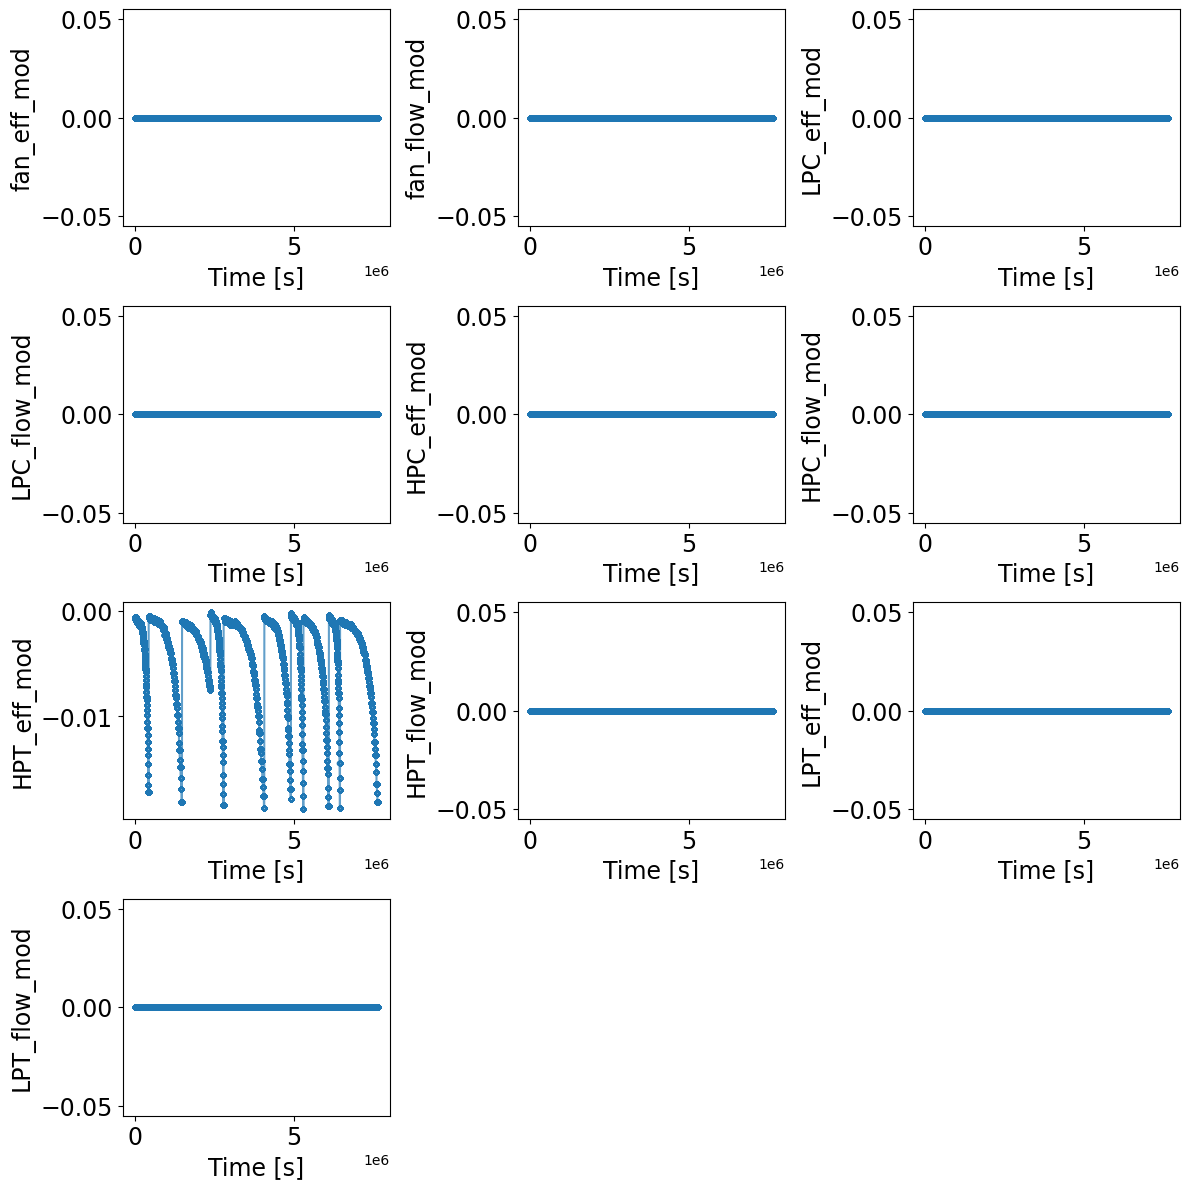

,fan_eff_mod,fan_flow_mod,LPC_eff_mod,LPC_flow_mod,HPC_eff_mod,HPC_flow_mod,HPT_eff_mod,HPT_flow_mod,LPT_eff_mod,LPT_flow_mod,unit,cycle
0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000604,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.000604,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,-0.000604,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.000604,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,-0.000604,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7641863,0.0,0.0,0.0,0.0,0.0,0.0,-0.018137,0.0,0.0,0.0,10.0,82.0
7641864,0.0,0.0,0.0,0.0,0.0,0.0,-0.018137,0.0,0.0,0.0,10.0,82.0
7641865,0.0,0.0,0.0,0.0,0.0,0.0,-0.018137,0.0,0.0,0.0,10.0,82.0
7641866,0.0,0.0,0.0,0.0,0.0,0.0,-0.018137,0.0,0.0,0.0,10.0,82.0


In [17]:
labels = T_var
plot_df_single_color(df_T, T_var , labels)
df_T

<Figure size 640x480 with 0 Axes>

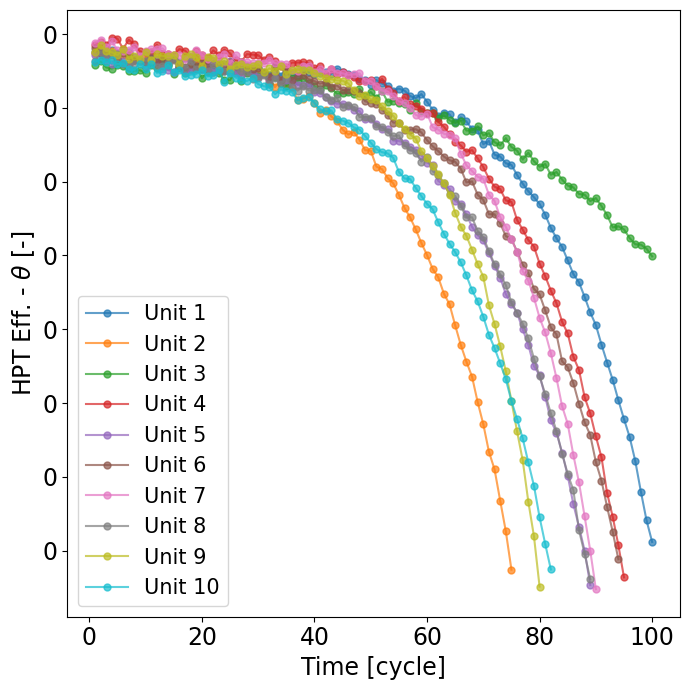

In [18]:
plot_df_color_per_unit(df_Ts, ['HPT_eff_mod'], [r'HPT Eff. - $\theta$ [-]'], size=7,  option='cycle')

In [19]:
df_X_s = DataFrame(data=X_s, columns=X_s_var) 

<Figure size 640x480 with 0 Axes>

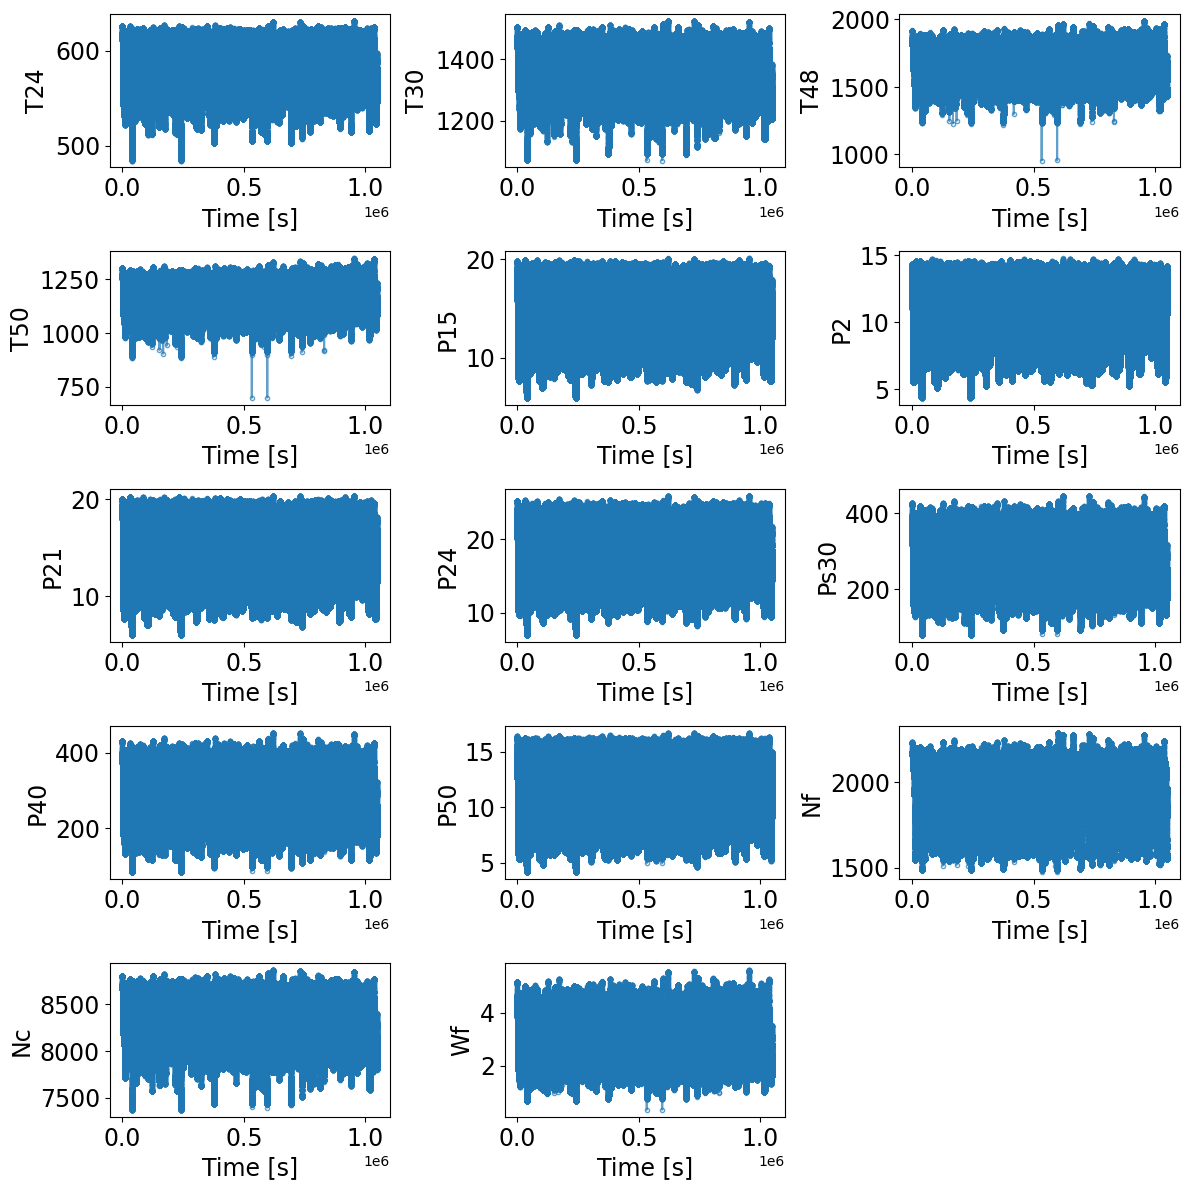

In [20]:
df_X_s_u = df_X_s.loc[df_A.unit == 2]
df_X_s_u.reset_index(inplace=True, drop=True)
labels = X_s_var
plot_df_single_color(df_X_s_u, X_s_var, labels)

<Figure size 640x480 with 0 Axes>

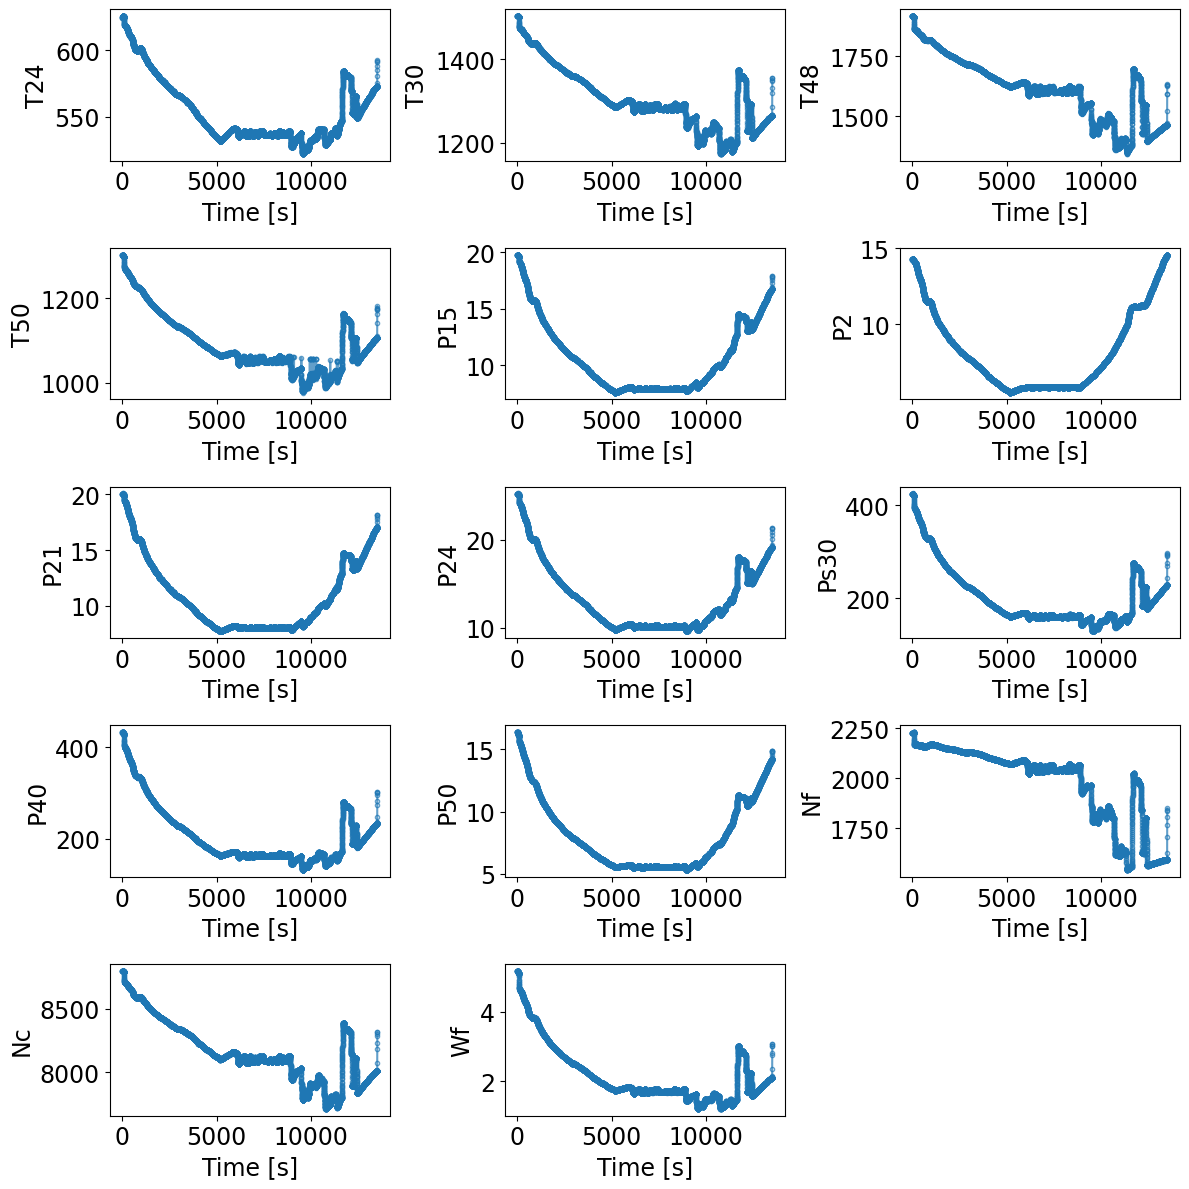

In [21]:
df_X_s_u_c = df_X_s.loc[(df_A.unit == 2) & (df_A.cycle == 1)]
df_X_s_u_c.reset_index(inplace=True, drop=True)
plot_df_single_color(df_X_s_u_c, X_s_var, X_s_var)

In [22]:
df_X_v = DataFrame(data=X_v, columns=X_v_var) 

<Figure size 640x480 with 0 Axes>

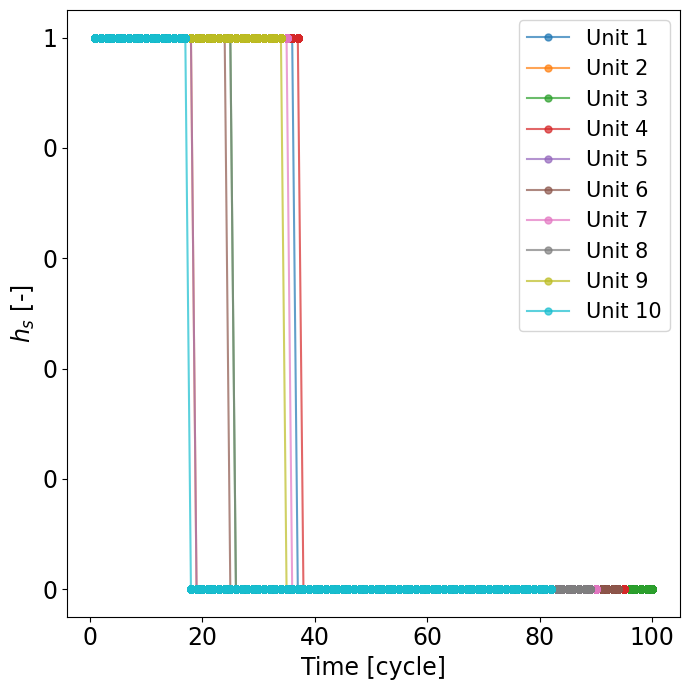

In [23]:
plot_df_color_per_unit(df_A, ['hs'], [r'$h_s$ [-]'], option='cycle')